# Perceptron

Answer all marked questions (❓).  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Question 1

Consider the following linearly separable training set:

$\mathbf{x^{(1)}} =\begin{bmatrix} -1 \\ 0  \\ \end{bmatrix} $,  $\mathbf{x^{(2)}} =\begin{bmatrix} 0 \\ 0.25  \\ \end{bmatrix} $,   $\mathbf{x^{(3)}} =\begin{bmatrix} 1 \\ 1 \\ \end{bmatrix} $,      $\mathbf{x^{(4)}} =\begin{bmatrix} 1 \\ -1  \\ \end{bmatrix} $

$y^{(1)} = -1$, $y^{(2)} = +1$, $y^{(3)} = +1$, $y^{(4)} = -1$


In [ ]:
# Define points
inputs = np.array([[-1, 0], [0, 0.25], [1, 1], [1, -1]])
labels = np.array([-1, 1, 1, -1])

num_examples, num_features = np.shape(inputs)

# Augment points with a dimension for the bias.
inputs = np.concatenate([np.ones((num_examples, 1)), inputs], axis=1)

print(np.shape(inputs))
print(inputs)
print(labels)

(4, 3)
[[ 1.   -1.    0.  ]
 [ 1.    0.    0.25]
 [ 1.    1.    1.  ]
 [ 1.    1.   -1.  ]]
[-1  1  1 -1]


❓ Let us use the perceptron algorithm to separate the two classes of points.

1. Initialize all weights to zero (including the bias)
2. Assume $sign(z) = +1$ iff $z ≥ 0$, and $−1$ if $z < 0$
3. Complete provided fucntion `perceptron_epoch` which performs one epoch of the perceptron algorithm
4. Use a learning rate of one
5. Apply algorithm until convergence

Note: You can use provided function `plot_separation_line` to see the points and the separating hyperplane in each epoch

In [ ]:
"""
Function to execute perceptron epoch.

Receives inputs, labels, previous weights (w) and learning rate(eta)

Should output number of mistakes and new weights
"""
def perceptron_epoch(inputs, labels, w, eta):
    mistakes = 0
    label_index = -1
    for row in inputs:
      label_index += 1
      y_estimated = np.sign(w.T.dot(row))
      if y_estimated != labels[label_index]:
        w = w + (labels[label_index] * eta * row)
        mistakes += 1
    plot_separation_line(inputs, labels, w)

    print("Mistakes: %d" % mistakes)
    return mistakes, w

In [ ]:
# Plot separation line associated with model w, along with the data.
def plot_separation_line(inputs, labels, w):
    # Plot data.
    plt.plot(inputs[labels == -1, 1], inputs[labels == -1, 2], "b.")
    plt.plot(inputs[labels == 1, 1], inputs[labels == 1, 2], "r.")
    # Plot model separation line.
    x1 = np.array([-2, 2])
    x2 = (-w[0] - w[1]*x1) / w[2]
    plt.plot(x1, x2, 'k--')
    plt.show()

[0. 0. 0.]


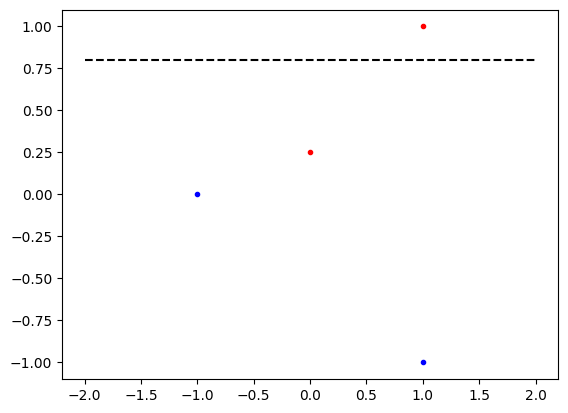

Mistakes: 3


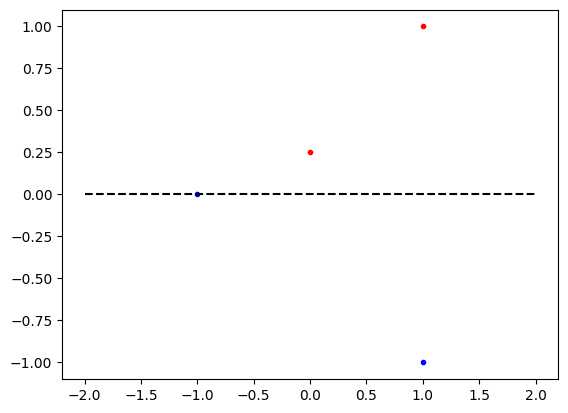

Mistakes: 1


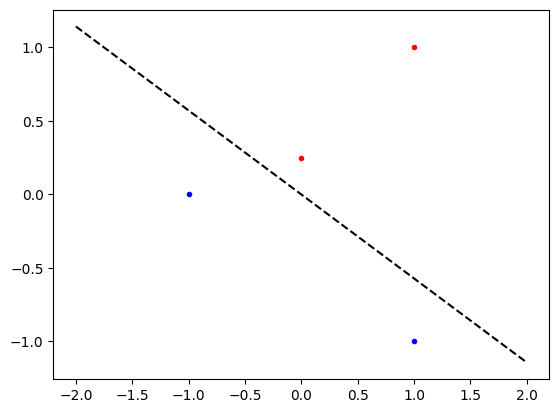

Mistakes: 2


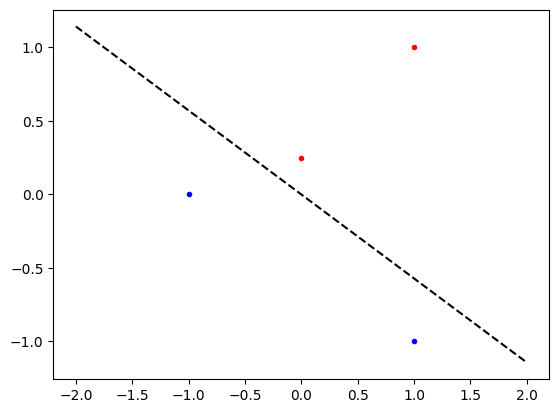

Mistakes: 0


In [ ]:
# TODO: Inititalize weights and apply algorithm until convergence

w = np.zeros((3,))
print(w)

while True:
  prev_w = np.copy(w)
  (mistakes, w) = perceptron_epoch(inputs, labels, w, eta=1)
  if (w == prev_w).all():
    break



❓ What is the perceptron output for query point $\begin{bmatrix} 0 && 1   \end{bmatrix}^T$?

In [ ]:
# TODO

❓ Change the initialization of weights and biases to be random with a standard normal distribution $\mathcal{N}(0,1)$. Try multiple times. Does it always converge?

*Hint:* `np.random.randn`

[-0.52378529  1.32767373 -0.93654273]


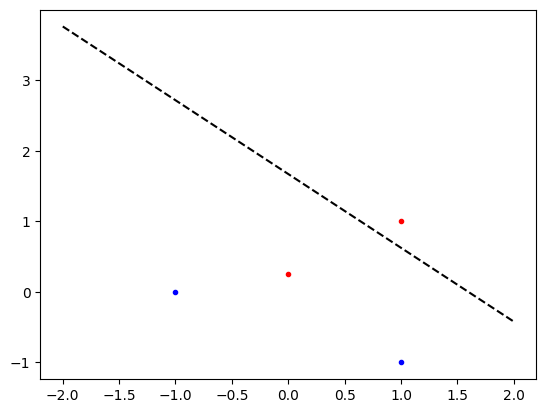

Mistakes: 2


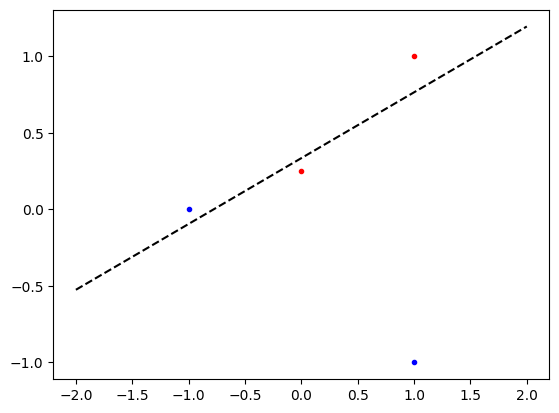

Mistakes: 2


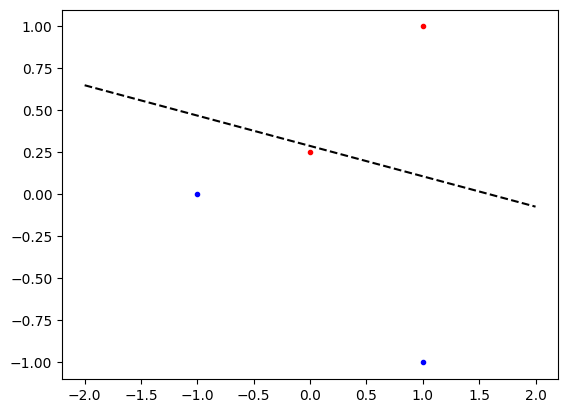

Mistakes: 2


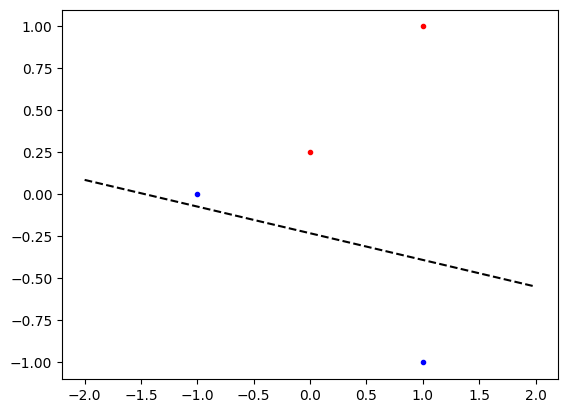

Mistakes: 1


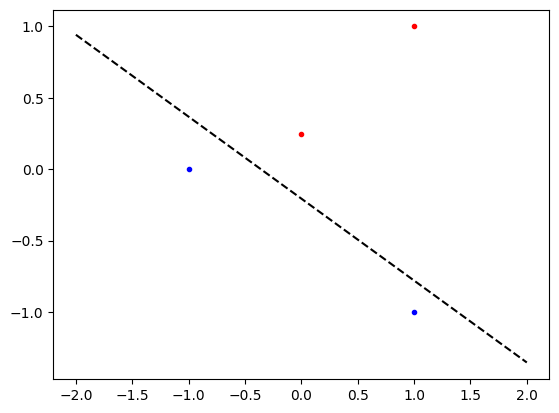

Mistakes: 2


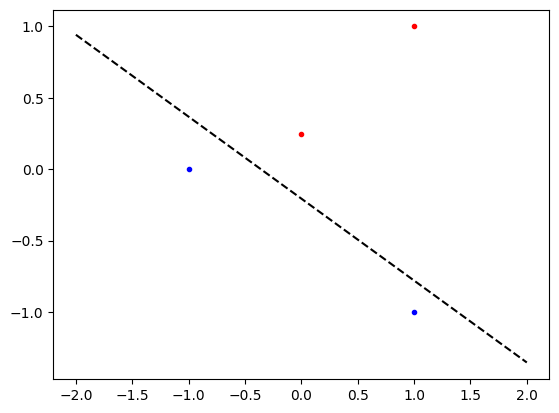

Mistakes: 0


In [ ]:
w = np.random.randn(3,)
print(w)

while True:
  prev_w = np.copy(w)
  (mistakes, w) = perceptron_epoch(inputs, labels, w, eta=1)
  if (w == prev_w).all():
    break


## Question 2

Let us generate a balanced dataset with 30 examples in $\mathbb{R}^2$ and 3 classes.
Assume each of the 10 inputs associated to class $k \in \{0,1,2\}$ is generated as $x \sim \mathcal{N}(\mu_k, \sigma_k^2 I)$, with $\sigma_0=\sigma_1=\sigma_2 = 1$,
$\mu_0 = [0, 0]^\top$, $\mu_1 = [0, 3]^\top$, and $\mu_2 = [2, 2]^\top$.

❓ Plot the data

In [ ]:
inputs0 = np.array([0, 0]) + np.random.randn(10, 2)
inputs1 = np.array([0, 3]) + np.random.randn(10, 2)
inputs2 = np.array([2, 2]) + np.random.randn(10, 2)

inputs = np.concatenate([inputs0, inputs1, inputs2], axis=0)

labels = np.array([0]*10 + [1]*10 + [2]*10)

# Shuffling observations
ind = np.random.permutation(30)
inputs = inputs[ind, :]
labels = labels[ind]

#print(inputs)
#print(labels)

[ 2 10 12 18 19 20 25 26 28 29]
[ 1  4  6  8 11 13 15 16 21 27]
[ 0  3  5  7  9 14 17 22 23 24]


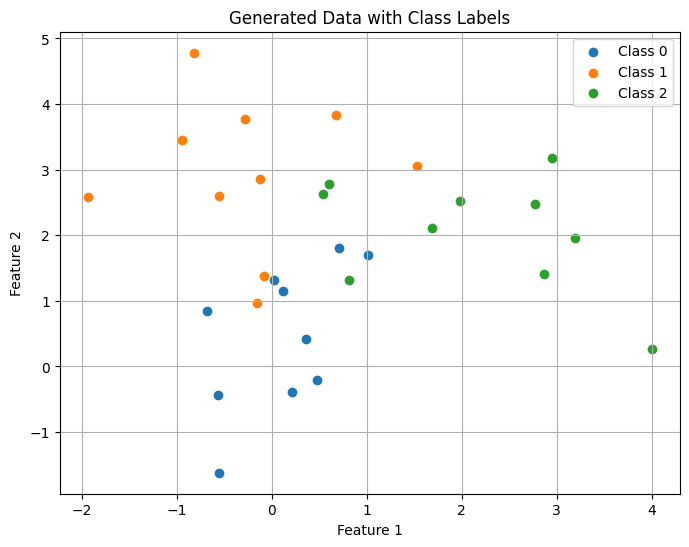

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6))

# Scatter plot for each class
for class_label in np.unique(labels):
    class_indices = np.where(labels == class_label)[0]
    print(class_indices)
    plt.scatter(inputs[class_indices, 0], inputs[class_indices, 1], label=f'Class {class_label}')

plt.title('Generated Data with Class Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

❓ Implement the multi-class perceptron algorithm by completing the `multi_class_perceptron_epoch` function.

❓ Complete function `multi_class_classify` so that it provides the predicted labels given the inputs and the weights.

❓ Create or import a function that computes accuracy given the arrays of predicted and correct labels.

❓ Run 100 iterations of the algorithm, initializing all the weights to zero and using a learning rate of one. Save the accuracy of each epoch in a list.

❓ What is the training accuracy (fraction of points that are correctly classified)?

❓ Plot the accuracies over epochs.

Note: Don't forget you have to augment the `inputs` with a dimension for the bias!

In [ ]:
def multi_class_perceptron_epoch(inputs, labels, W, eta=1):
    mistakes = 0
    for i, (x, y) in enumerate(zip(inputs, labels)):

        # TODO: complete with perceptron algorithm
        predicted_labels = multi_class_classify(inputs, W)

        y_estimated = predicted_labels[i]

        if (y != y_estimated):
          W[y] += x
          W[y_estimated] -= x
          mistakes += 1
        #pass
    print('accuracy', compute_accuracy(predicted_labels, labels))
    print("Mistakes: %d" % mistakes)
    return W

In [ ]:
def multi_class_classify(inputs, W):

    # TODO: complete
    n_inputs, _ = np.shape(inputs)
    predicted_labels = np.empty(n_inputs, dtype=int)
    for i, x in enumerate(inputs):
      biggest_score = -1
      for u, w in enumerate(W):
        #print('w', w)
        #print('x', x)
        score = w.T.dot(x)
        #print('score', score)
        if score > biggest_score:
          biggest_score = score
          predicted_labels[i] = u


    return predicted_labels

In [ ]:
# TODO: function to compute accuracy
def compute_accuracy(predicted, correct):
  correct_predictions = 0
  for p, c in zip(predicted, correct):
    if (p == c):
      correct_predictions += 1

  return correct_predictions / correct.size

In [ ]:
num_examples, num_features = np.shape(inputs)

# Augment points with a dimension for the bias.
inputs = np.concatenate([np.ones((num_examples, 1)), inputs], axis=1)
#print(inputs)

W = np.zeros((3, 3))
#print(W)

In [ ]:
# TODO: Run algorithm, compute final accuracies, plot accuracies over epochs

for _ in range(100):
  prev_w = W.copy()
  W = multi_class_perceptron_epoch(inputs, labels, W, eta=1)

accuracy 0.8
Mistakes: 14
accuracy 0.7333333333333333
Mistakes: 12
accuracy 0.7333333333333333
Mistakes: 12
accuracy 0.7
Mistakes: 11
accuracy 0.7666666666666667
Mistakes: 10
accuracy 0.7666666666666667
Mistakes: 8
accuracy 0.8
Mistakes: 10
accuracy 0.8
Mistakes: 11
accuracy 0.7666666666666667
Mistakes: 10
accuracy 0.7666666666666667
Mistakes: 9
accuracy 0.8
Mistakes: 10
accuracy 0.7666666666666667
Mistakes: 8
accuracy 0.7
Mistakes: 11
accuracy 0.8
Mistakes: 10
accuracy 0.7333333333333333
Mistakes: 9
accuracy 0.7666666666666667
Mistakes: 10
accuracy 0.8
Mistakes: 10
accuracy 0.8
Mistakes: 11
accuracy 0.7333333333333333
Mistakes: 9
accuracy 0.7666666666666667
Mistakes: 10
accuracy 0.7666666666666667
Mistakes: 10
accuracy 0.8
Mistakes: 10
accuracy 0.7666666666666667
Mistakes: 10
accuracy 0.7666666666666667
Mistakes: 10
accuracy 0.8
Mistakes: 12
accuracy 0.7666666666666667
Mistakes: 10
accuracy 0.8
Mistakes: 10
accuracy 0.7333333333333333
Mistakes: 9
accuracy 0.8
Mistakes: 10
accuracy 0.7

## Question 3

Now it's time to try the perceptron on real data and see what happens.  

Let's load the UCI handwritten digits dataset using `scikit-learn`

In [ ]:
from sklearn.datasets import load_digits
data = load_digits()

In [ ]:
X = data['data']
y = data['target']
print(X, y)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]] [0 1 2 ... 8 9 8]


In [ ]:
num_examples, num_features = np.shape(X)
num_labels = np.max(y)+1  # labels are 0, 1, ..., num_labels-1

# Augment points with a dimension for the bias.
X = np.concatenate([np.ones((num_examples, 1)), X], axis=1)

This is a dataset containing $1797$ 8x8 input images of digits, each corresponding to one out of 10 output classes.
You can print the dataset description with `print(data.DESCR)
` and visualize some input examples:

<Figure size 640x480 with 0 Axes>

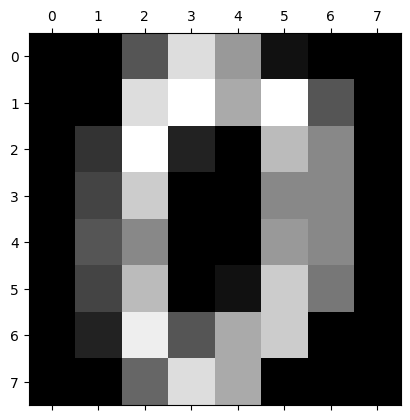

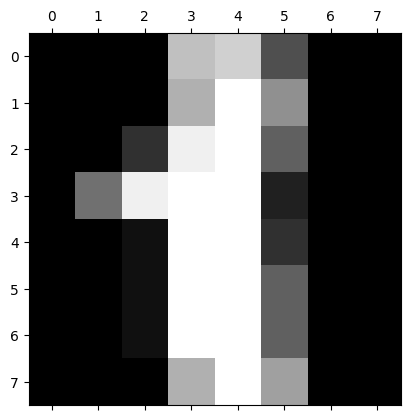

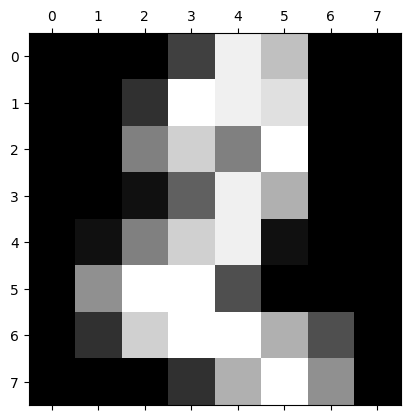

In [ ]:
import matplotlib.pyplot as plt
plt.gray()
for i in range(3):
    plt.matshow(data.images[i])
plt.show()

We randomly split this data into training (80\%) and test (20\%) partitions. This can be done with:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

❓ Run your implementation of the multi-class perceptron algorithm on this dataset. Measure the training and test accuracy.

In [ ]:
# TODO
w_rows = np.unique(y_train).size
_, w_cols = np.shape(X_train)
W = np.zeros((w_rows, w_cols))

print(np.shape(X_train))
print(np.shape(np.unique(y_train)))
print(np.shape(W))
print(X_train, y_train)

W = multi_class_perceptron_epoch(X_train, y_train, W, eta=1)

(1437, 65)
(10,)
(10, 65)
[[ 1.  0.  0. ... 13.  4.  0.]
 [ 1.  0.  0. ...  3.  0.  0.]
 [ 1.  0.  0. ...  6.  0.  0.]
 ...
 [ 1.  0.  0. ... 16.  2.  0.]
 [ 1.  0.  0. ...  0.  0.  0.]
 [ 1.  0.  0. ...  1.  0.  0.]] [6 0 0 ... 2 7 1]
accuracy 0.8886569241475296
Mistakes: 329


Let's use `scikit-learn`'s implementation of the perceptron algorithm. You can check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) to understand what hyperparameters they are using and why the performances are different

In [ ]:
from sklearn.linear_model import Perceptron
clf = Perceptron(fit_intercept=False, shuffle=False)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.9735560194850382
0.9583333333333334
